In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers, losses, metrics
from sklearn.model_selection import train_test_split
import numpy as np

2024-08-07 23:48:14.253240: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
# сформируем скомпрометированные датасеты
with open('datasets.txt', 'r') as file:
    records = [line.rstrip().split(' ') for line in file]
# print(type(records))
bad_article_records = []
for line in records:
    # print(line)
    if '99999.0' not in line:
        for i in range(len(line)):
            if '.' in line[i]:
                line[i] = str(float(line[i]) + float(np.random.uniform(0.9, 1.1)))
        bad_article_records.append(line)
    # print(line)
# for line in records:
# print(line)
with open('datasets_bad_article.txt', 'w') as file:
    for line in bad_article_records:
        s = ' '.join(line) + '\n'
        file.write(s)

# with open('datasets.txt', 'r') as file:
#     records = [line.rstrip().split(' ') for line in file]
# # print(type(records))
# for line in records:
#     # print(line)
#     for i in range(len(line)):
#         if '.' in line[i]:
#             line[i] = str(np.float32(np.random.uniform(0.0001, 0.02)))
#     # print(line)
# # for line in records:
#     # print(line)
# with open('datasets_bad_short.txt', 'w') as file:
#     for line in records:
#         s = ' '.join(line) + '\n'
#         file.write(s)

In [2]:
def get_X(datasets_file: str):
    with open(datasets_file, 'r') as file:
        records = [line.rstrip().split() for line in file]
    X = []
    step = 2
    for line in records:
        n = len(line)
        if n >= step:
            # print(line)
            for i in range(0, n - step, step):
                X.append(np.array([np.float32(x) for x in line[i:i + step + 1]]))
        # else:
        #     x = line[0]
        #     X.append(np.array([np.float32(x), np.float32(np.random.uniform(1.0, 4.0)), np.float32(x)]))
    X = np.vstack(X)
    return X

In [20]:
X = get_X('datasets.txt')
X.shape

(40697, 3)

In [21]:
X = np.vstack((X, get_X('datasets_bad_long.txt')))
X.shape

(81394, 3)

In [22]:
# X = np.vstack((X, get_X('datasets_bad_short.txt')))
# X.shape

In [23]:
def norm_bad_datasemples(X):
    mask = (X[:, 1] == 99999.0)
    X[mask, 1] = np.float32(np.random.uniform(1.0, 4.0, size=np.sum(mask)))
    return X

X = norm_bad_datasemples(X)

In [24]:
def get_y(X):
    # Создание маски, которая проверяет наличие 99999.0 в строках X
    mask = (X[:, 1] > 1.0)
    # mask2 = (X[:, 1] < 0.05)
    # mask = mask1 | mask2

    # Создание y на основе маски
    y = mask.astype(int)

    # # Дополнительный вывод для проверки правильности соответствия
    # print("\nПроверка соответствия:")
    # for i in range(X.shape[0]):
    #     if y[i] == 0:
    #         print(f"Строка {i+1} в X: {X[i]} -> метка в y: {y[i]}")
    return np.array(y)

In [25]:
y = get_y(X)
y.shape

(81394,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [27]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(65115, 3) (65115,) (16279, 3) (16279,)


In [33]:
for i in range(30000, 30100):
    print(X_train[i], y_train[i])

[1.1600e+04 1.7103e-01 1.2100e+04] 0
[9.9000e+04 2.2797e-01 1.0600e+04] 0
[9.9000e+04 1.4601e-01 1.1000e+04] 0
[1.1400e+04 1.3002e-01 9.8000e+04] 0
[1.1500000e+04 1.8414782e+00 1.1500000e+04] 1
[9.9000e+04 1.9713e-01 1.0500e+04] 0
[9.9000000e+04 3.8092103e+00 1.2200000e+04] 1
[9.8000000e+04 3.5092368e+00 1.2100000e+04] 1
[1.1600000e+04 1.2748544e+00 1.0500000e+04] 1
[1.1000000e+04 3.2009377e+00 9.7000000e+04] 1
[1.1500000e+04 2.6765473e+00 1.1500000e+04] 1
[6.5505e+04 2.7105e-01 3.8000e+04] 0
[1.2100e+04 1.0848e-01 1.1600e+04] 0
[4.9000000e+04 1.5442575e+00 6.5506000e+04] 1
[1.0600000e+04 3.3710935e+00 1.1300000e+04] 1
[1.10e+04 1.40e-01 1.09e+04] 0
[1.0200e+04 1.5601e-01 1.1400e+04] 0
[1.0200e+04 4.0145e-01 1.1100e+04] 0
[4.600000e+04 3.899608e+00 4.800000e+04] 1
[1.0200000e+04 3.1499531e+00 1.1600000e+04] 1
[4.4000000e+04 1.4445708e+00 4.4000000e+04] 1
[1.1200000e+04 3.8716438e+00 1.0200000e+04] 1
[1.090000e+04 1.639865e+00 1.050000e+04] 1
[1.0400000e+04 1.6657796e+00 1.1500000e+04] 

In [28]:
# Создание модели
modls = []
a, b, c = 8, 12, 4
for i in range(10):
    print(i)
    model = models.Sequential([
        layers.Dense(8, input_shape=(3,), activation='relu'),
        # layers.Dropout(0.5),
        # layers.Dense(8, activation='relu'),
        # layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    # Компиляция модели
    model.compile(optimizer=optimizers.Adam(),
                  loss=losses.binary_crossentropy,
                  metrics=['accuracy'])

    early_stop = callbacks.EarlyStopping(
                                        monitor='val_accuracy',
                                        patience=5,
                                        restore_best_weights=True,
                                        mode='max',
                                        verbose=1
                                         )
    checkpoints = callbacks.ModelCheckpoint(
                                        filepath='./models_new/_{val_accuracy:.6f}.h5',
                                        monitor='val_accuracy',
                                        save_best_only=True,
                                        mode='max',
                                        verbose=1
                                        )
    # Обучение модели
    model.fit(X_train, y_train,
              epochs=10,
              batch_size=32,
              validation_split=0.3,
              callbacks=[early_stop, checkpoints],
              verbose=False)

    # Оценка модели
    loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
    # print(f"i = {i}: Test Accuracy: {accuracy:.4f}")
    modls.append((accuracy, model))
# for i in range(len(modls)):
#     print(i, modls[i][0])

0

Epoch 1: val_accuracy improved from -inf to 0.55270, saving model to ./models_new\_0.552700.h5

Epoch 2: val_accuracy improved from 0.55270 to 0.75291, saving model to ./models_new\_0.752905.h5

Epoch 3: val_accuracy did not improve from 0.75291

Epoch 4: val_accuracy improved from 0.75291 to 0.80589, saving model to ./models_new\_0.805887.h5

Epoch 5: val_accuracy did not improve from 0.80589

Epoch 6: val_accuracy did not improve from 0.80589

Epoch 7: val_accuracy improved from 0.80589 to 0.87827, saving model to ./models_new\_0.878270.h5

Epoch 8: val_accuracy improved from 0.87827 to 0.89910, saving model to ./models_new\_0.899104.h5

Epoch 9: val_accuracy did not improve from 0.89910

Epoch 10: val_accuracy did not improve from 0.89910
1

Epoch 1: val_accuracy improved from -inf to 0.46552, saving model to ./models_new\_0.465523.h5

Epoch 2: val_accuracy improved from 0.46552 to 0.51165, saving model to ./models_new\_0.511646.h5

Epoch 3: val_accuracy improved from 0.51165 to 

In [29]:
# Пример предсказания
examples = np.array([
                    [[46000, 4.501, 10800]],
                    [[46000, 4.001, 10800]],
                    [[46000, 3.201, 10800]],
                    [[46000, 3.01, 10800]],
                    [[46000, 2.0001, 10800]],
                    [[46000, 1.801, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.4009, 10800]],
                    [[46000, 1.3009, 10800]],
                    [[46000, 1.2009, 10800]],
                    [[46000, 1.19, 10800]],
                    [[46000, 0.999, 10800]],
                    [[46000, 0.501, 10800]],
                    [[46000, 0.301, 10800]],
                    [[46000, 0.201, 10800]],
                    [[46000, 0.1013, 10800]],
                    [[46000, 0.0901, 10800]],
                    [[46000, 0.0501, 10800]],
                    [[46000, 0.0101, 10800]],
                    [[46000, 0.0081, 10800]],
                    [[46000, 0.0051, 10800]],
                    [[46000, 0.0011, 10800]]
                    ])
for example in examples:
    prediction = model.predict(example, verbose=False)
    print(f"Prediction for {example[0][1]}: {prediction[0][0]} -> {round(prediction[0][0])}")

Prediction for 4.501: 1.0 -> 1
Prediction for 4.001: 1.0 -> 1
Prediction for 3.201: 1.0 -> 1
Prediction for 3.01: 1.0 -> 1
Prediction for 2.0001: 0.9999958872795105 -> 1
Prediction for 1.801: 0.9999361038208008 -> 1
Prediction for 1.5009: 0.9960223436355591 -> 1
Prediction for 1.5009: 0.9960223436355591 -> 1
Prediction for 1.4009: 0.9844160079956055 -> 1
Prediction for 1.3009: 0.9408585429191589 -> 1
Prediction for 1.2009: 0.800416111946106 -> 1
Prediction for 1.19: 0.775397002696991 -> 1
Prediction for 0.999: 0.1990281641483307 -> 0
Prediction for 0.501: 0.0002602745371405035 -> 0
Prediction for 0.301: 1.654448169574607e-05 -> 0
Prediction for 0.201: 4.173660272499546e-06 -> 0
Prediction for 0.1013: 1.0569950745775714e-06 -> 0
Prediction for 0.0901: 9.057209808815969e-07 -> 0
Prediction for 0.0501: 5.222000254434533e-07 -> 0
Prediction for 0.0101: 3.009925251262757e-07 -> 0
Prediction for 0.0081: 2.9268338153087825e-07 -> 0
Prediction for 0.0051: 2.8078505920348107e-07 -> 0
Prediction

In [30]:
model.save('smth_good.h5')

In [46]:
loaded = models.load_model('smth_good.h5')

# Пример предсказания
examples = np.array([
                    [[46000, 4.501, 10800]],
                    [[46000, 4.001, 10800]],
                    [[46000, 3.201, 10800]],
                    [[46000, 3.01, 10800]],
                    [[46000, 2.0001, 10800]],
                    [[46000, 1.801, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.4009, 10800]],
                    [[46000, 1.3009, 10800]],
                    [[46000, 1.2009, 10800]],
                    [[46000, 1.19, 10800]],
                    [[46000, 1.01, 10800]],
                    [[46000, 1.0, 10800]],
                    [[46000, 0.999, 10800]],
                    [[46000, 0.501, 10800]],
                    [[46000, 0.301, 10800]],
                    [[46000, 0.201, 10800]],
                    [[46000, 0.1013, 10800]],
                    [[46000, 0.0901, 10800]],
                    [[46000, 0.0501, 10800]],
                    [[46000, 0.0101, 10800]],
                    [[46000, 0.0081, 10800]],
                    [[46000, 0.0051, 10800]],
                    [[46000, 0.0011, 10800]]
                    ])
for example in examples:
    prediction = loaded.predict(example, verbose=False)
    print(f"Prediction for {example[0][1]}: {prediction[0][0]:.5f} -> {round(prediction[0][0])}")

Prediction for 4.501: 1.00000 -> 1
Prediction for 4.001: 1.00000 -> 1
Prediction for 3.201: 1.00000 -> 1
Prediction for 3.01: 1.00000 -> 1
Prediction for 2.0001: 1.00000 -> 1
Prediction for 1.801: 0.99994 -> 1
Prediction for 1.5009: 0.99602 -> 1
Prediction for 1.5009: 0.99602 -> 1
Prediction for 1.4009: 0.98442 -> 1
Prediction for 1.3009: 0.94086 -> 1
Prediction for 1.2009: 0.80042 -> 1
Prediction for 1.19: 0.77540 -> 1
Prediction for 1.01: 0.22417 -> 0
Prediction for 1.0: 0.20135 -> 0
Prediction for 0.999: 0.19903 -> 0
Prediction for 0.501: 0.00026 -> 0
Prediction for 0.301: 0.00002 -> 0
Prediction for 0.201: 0.00000 -> 0
Prediction for 0.1013: 0.00000 -> 0
Prediction for 0.0901: 0.00000 -> 0
Prediction for 0.0501: 0.00000 -> 0
Prediction for 0.0101: 0.00000 -> 0
Prediction for 0.0081: 0.00000 -> 0
Prediction for 0.0051: 0.00000 -> 0
Prediction for 0.0011: 0.00000 -> 0


In [42]:
loaded = models.load_model('./models_new/_0.987766.h5')

early_stop = callbacks.EarlyStopping(
                                        monitor='val_accuracy',
                                        patience=5,
                                        restore_best_weights=True,
                                        mode='max',
                                        verbose=1
                                        )

checkpoints = callbacks.ModelCheckpoint(
                                        filepath='./models_new/_{val_accuracy:.6f}.h5',
                                        monitor='val_accuracy',
                                        save_best_only=True,
                                        mode='max',
                                        verbose=1
                                        )

loaded.fit(X_train, y_train,
              epochs=10,
              batch_size=32,
              validation_split=0.3,
              callbacks=[early_stop, checkpoints],
              verbose=True)

loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print(f"i = {i}: Test Accuracy: {accuracy:.4f}")

Epoch 1/10
1413/1425 [============================>.] - ETA: 0s - loss: 22.0408 - accuracy: 0.8191
Epoch 1: val_accuracy improved from -inf to 0.95270, saving model to ./models_new\_0.952700.h5
1425/1425 [==============================] - 3s 2ms/step - loss: 21.8691 - accuracy: 0.8201 - val_loss: 3.4790 - val_accuracy: 0.9527
Epoch 2/10
1411/1425 [============================>.] - ETA: 0s - loss: 19.1554 - accuracy: 0.8430
Epoch 2: val_accuracy did not improve from 0.95270
1425/1425 [==============================] - 3s 2ms/step - loss: 18.9893 - accuracy: 0.8436 - val_loss: 3.4169 - val_accuracy: 0.9186
Epoch 3/10
1412/1425 [============================>.] - ETA: 0s - loss: 20.6923 - accuracy: 0.8591
Epoch 3: val_accuracy did not improve from 0.95270
1425/1425 [==============================] - 3s 2ms/step - loss: 20.5137 - accuracy: 0.8601 - val_loss: 3.0370 - val_accuracy: 0.9396
Epoch 4/10
1397/1425 [============================>.] - ETA: 0s - loss: 12.6675 - accuracy: 0.8690
Epoch

In [15]:
model.save('model.h5')

In [53]:
loaded = models.load_model('./models/_0.993771.h5')

In [52]:
loaded = models.load_model('./models/_0.987930.h5')

early_stop = callbacks.EarlyStopping(
                                        monitor='val_accuracy',
                                        patience=5,
                                        restore_best_weights=True,
                                        mode='max',
                                        verbose=1
                                        )

checkpoints = callbacks.ModelCheckpoint(
                                        filepath='./models/_{val_accuracy:.6f}.h5',
                                        monitor='val_accuracy',
                                        save_best_only=True,
                                        mode='max',
                                        verbose=1
                                        )

loaded.fit(X_train, y_train,
              epochs=10,
              batch_size=32,
              validation_split=0.3,
              callbacks=[early_stop, checkpoints],
              verbose=True)

loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print(f"i = {i}: Test Accuracy: {accuracy:.4f}")

Epoch 1/10
1311/1311 [==============================] - ETA: 0s - loss: 8.6434 - accuracy: 0.8488
Epoch 1: val_accuracy improved from -inf to 0.97614, saving model to ./models\_0.976139.h5
1311/1311 [==============================] - 3s 2ms/step - loss: 8.6434 - accuracy: 0.8488 - val_loss: 0.1865 - val_accuracy: 0.9761
Epoch 2/10
1280/1311 [============================>.] - ETA: 0s - loss: 25.1228 - accuracy: 0.8304
Epoch 2: val_accuracy did not improve from 0.97614
1311/1311 [==============================] - 2s 2ms/step - loss: 24.5635 - accuracy: 0.8322 - val_loss: 1.5222 - val_accuracy: 0.9010
Epoch 3/10
1304/1311 [============================>.] - ETA: 0s - loss: 15.7450 - accuracy: 0.8480
Epoch 3: val_accuracy did not improve from 0.97614
1311/1311 [==============================] - 2s 2ms/step - loss: 15.7166 - accuracy: 0.8475 - val_loss: 8.5398 - val_accuracy: 0.6988
Epoch 4/10
1287/1311 [============================>.] - ETA: 0s - loss: 19.5090 - accuracy: 0.8422
Epoch 4: va

In [55]:
# Пример предсказания
examples = np.array([
                    [[46000, 4.501, 10800]],
                    [[46000, 4.001, 10800]],
                    [[46000, 3.201, 10800]],
                    [[46000, 3.01, 10800]],
                    [[46000, 2.0001, 10800]],
                    [[46000, 1.801, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.4009, 10800]],
                    [[46000, 1.3009, 10800]],
                    [[46000, 1.2009, 10800]],
                    [[46000, 1.19, 10800]],
                    [[46000, 0.999, 10800]],
                    [[46000, 0.501, 10800]],
                    [[46000, 0.301, 10800]],
                    [[46000, 0.201, 10800]],
                    [[46000, 0.1013, 10800]],
                    [[46000, 0.0901, 10800]],
                    [[46000, 0.0501, 10800]],
                    [[46000, 0.0101, 10800]],
                    [[46000, 0.0081, 10800]],
                    [[46000, 0.0051, 10800]],
                    [[46000, 0.0011, 10800]]
                    ])
for example in examples:
    prediction = loaded.predict(example, verbose=False)
    print(f"Prediction for {example[0][1]}: {prediction[0][0]:.5f} -> {round(prediction[0][0])}")

Prediction for 4.501: 1.00000 -> 1
Prediction for 4.001: 1.00000 -> 1
Prediction for 3.201: 1.00000 -> 1
Prediction for 3.01: 1.00000 -> 1
Prediction for 2.0001: 0.99997 -> 1
Prediction for 1.801: 0.99618 -> 1
Prediction for 1.5009: 0.13442 -> 0
Prediction for 1.5009: 0.13442 -> 0
Prediction for 1.4009: 0.01292 -> 0
Prediction for 1.3009: 0.00110 -> 0
Prediction for 1.2009: 0.00009 -> 0
Prediction for 1.19: 0.00007 -> 0
Prediction for 0.999: 0.00000 -> 0
Prediction for 0.501: 0.00000 -> 0
Prediction for 0.301: 0.00000 -> 0
Prediction for 0.201: 0.00000 -> 0
Prediction for 0.1013: 0.00000 -> 0
Prediction for 0.0901: 0.00000 -> 0
Prediction for 0.0501: 0.00000 -> 0
Prediction for 0.0101: 0.00000 -> 0
Prediction for 0.0081: 0.00000 -> 0
Prediction for 0.0051: 0.00000 -> 0
Prediction for 0.0011: 0.00000 -> 0


In [3]:

from tensorflow.keras import models
import numpy as np

loaded = models.load_model('./models/_0.993771.h5')
# Пример предсказания
examples = np.array([
                    [[46000, 4.501, 10800]],
                    [[46000, 4.001, 10800]],
                    [[46000, 3.201, 10800]],
                    [[46000, 3.01, 10800]],
                    [[46000, 2.0001, 10800]],
                    [[46000, 1.801, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.4009, 10800]],
                    [[46000, 1.3009, 10800]],
                    [[46000, 1.2009, 10800]],
                    [[46000, 1.19, 10800]],
                    [[46000, 0.999, 10800]],
                    [[46000, 0.501, 10800]],
                    [[46000, 0.301, 10800]],
                    [[46000, 0.201, 10800]],
                    [[46000, 0.1013, 10800]],
                    [[46000, 0.0901, 10800]],
                    [[46000, 0.0501, 10800]],
                    [[46000, 0.0101, 10800]],
                    [[46000, 0.0081, 10800]],
                    [[46000, 0.0051, 10800]],
                    [[46000, 0.0011, 10800]]
                    ])
for example in examples:
    prediction = loaded.predict(example, verbose=False)
    print(f"Prediction for {example[0][1]}: {prediction} -> {round(prediction[0][0])}")

Prediction for 4.501: [[1.]] -> 1
Prediction for 4.001: [[1.]] -> 1
Prediction for 3.201: [[1.]] -> 1
Prediction for 3.01: [[1.]] -> 1
Prediction for 2.0001: [[0.9999722]] -> 1
Prediction for 1.801: [[0.9961847]] -> 1
Prediction for 1.5009: [[0.13441792]] -> 0
Prediction for 1.5009: [[0.13441792]] -> 0
Prediction for 1.4009: [[0.01291617]] -> 0
Prediction for 1.3009: [[0.00110136]] -> 0
Prediction for 1.2009: [[9.280609e-05]] -> 0
Prediction for 1.19: [[7.082638e-05]] -> 0
Prediction for 0.999: [[6.275357e-07]] -> 0
Prediction for 0.501: [[2.793794e-12]] -> 0
Prediction for 0.301: [[1.9816692e-14]] -> 0
Prediction for 0.201: [[1.6673479e-15]] -> 0
Prediction for 0.1013: [[1.4147082e-16]] -> 0
Prediction for 0.0901: [[1.0726955e-16]] -> 0
Prediction for 0.0501: [[3.9924385e-17]] -> 0
Prediction for 0.0101: [[1.4808656e-17]] -> 0
Prediction for 0.0081: [[1.4101547e-17]] -> 0
Prediction for 0.0051: [[1.3100537e-17]] -> 0
Prediction for 0.0011: [[1.1855954e-17]] -> 0


In [73]:
loaded = models.load_model('best_model_3-8-1-0.9736.h5')

In [48]:
# Пример предсказания
examples = np.array([
                    [[46000, 4.501, 10800]],
                    [[46000, 4.001, 10800]],
                    [[46000, 3.201, 10800]],
                    [[46000, 3.01, 10800]],
                    [[46000, 2.0001, 10800]],
                    [[46000, 1.801, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.4009, 10800]],
                    [[46000, 1.3009, 10800]],
                    [[46000, 1.2009, 10800]],
                    [[46000, 1.19, 10800]],
                    [[46000, 0.999, 10800]],
                    [[46000, 0.501, 10800]],
                    [[46000, 0.301, 10800]],
                    [[46000, 0.201, 10800]],
                    [[46000, 0.1013, 10800]],
                    [[46000, 0.0901, 10800]],
                    [[46000, 0.0501, 10800]],
                    [[46000, 0.0101, 10800]],
                    [[46000, 0.0081, 10800]],
                    [[46000, 0.0051, 10800]],
                    [[46000, 0.0011, 10800]]
                    ])
for example in examples:
    prediction = loaded.predict(example, verbose=False)
    print(f"Prediction for {example[0][1]}: {prediction[0][0]:.5f} -> {round(prediction[0][0])}")

Prediction for 4.501: 1.00000 -> 1
Prediction for 4.001: 1.00000 -> 1
Prediction for 3.201: 0.99987 -> 1
Prediction for 3.01: 0.99968 -> 1
Prediction for 2.0001: 0.96603 -> 1
Prediction for 1.801: 0.91831 -> 1
Prediction for 1.5009: 0.73530 -> 1
Prediction for 1.5009: 0.73530 -> 1
Prediction for 1.4009: 0.63550 -> 1
Prediction for 1.3009: 0.52274 -> 1
Prediction for 1.2009: 0.40762 -> 0
Prediction for 1.19: 0.39540 -> 0
Prediction for 0.999: 0.21157 -> 0
Prediction for 0.501: 0.02572 -> 0
Prediction for 0.301: 0.01030 -> 0
Prediction for 0.201: 0.00649 -> 0
Prediction for 0.1013: 0.00409 -> 0
Prediction for 0.0901: 0.00388 -> 0
Prediction for 0.0501: 0.00322 -> 0
Prediction for 0.0101: 0.00268 -> 0
Prediction for 0.0081: 0.00265 -> 0
Prediction for 0.0051: 0.00262 -> 0
Prediction for 0.0011: 0.00257 -> 0


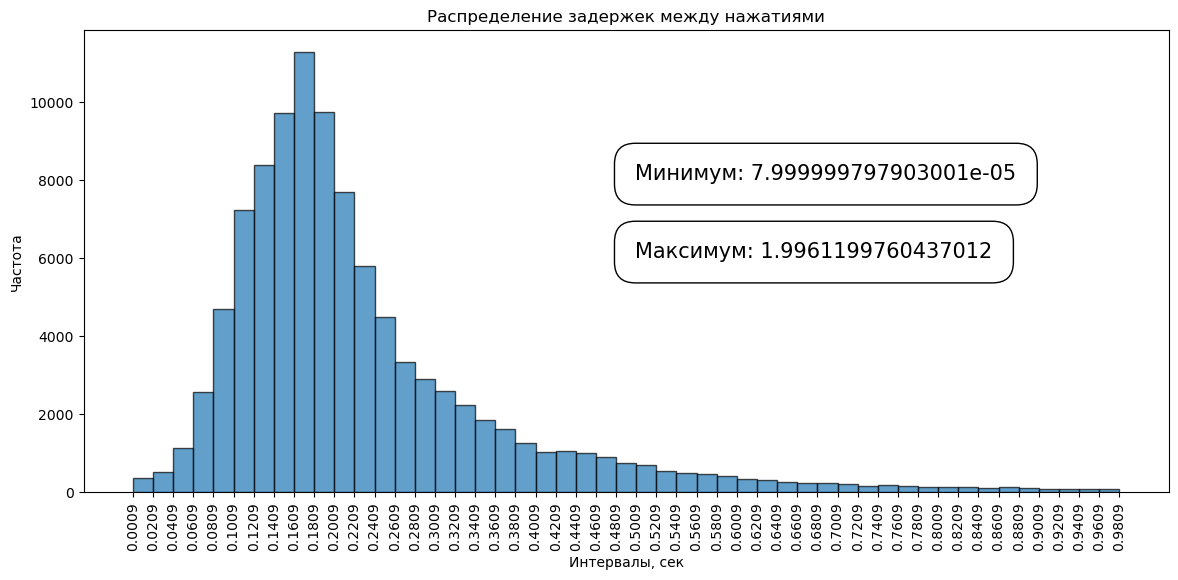

In [45]:
import numpy as np
import matplotlib.pyplot as plt

data = get_X('datasets.txt')[:, 1]
mask = data != 99999.0
data = data[mask]

# Определение интервалов
bins = np.arange(0.0009, 1.0, 0.02)

# Построение гистограммы
hist, bin_edges = np.histogram(data, bins=bins)

# Вывод интервалов и соответствующих подсчетов
# for i in range(len(hist)):
#     print(f"От {bin_edges[i]} до {bin_edges[i+1]}: {hist[i]}")

# Построение графика
plt.figure(figsize=(14, 6))

plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel('Интервалы, сек')
plt.ylabel('Частота')
plt.title('Распределение задержек между нажатиями')

# plt.xticks(bins)
plt.xticks(bins, rotation=90)  # Установка меток оси X и их поворот на 90 градусов для лучшей читаемости
# plt.grid(axis='x', linestyle='--')  # Добавление сетки по оси X для лучшей визуализации

# Добавление рамки с минимальным и максимальным значениями
# Добавление рамки с минимальным и максимальным значениями
# print(data.min(), data.max())
plt.text(0.5, 8000, f"Минимум: {data.min()}", fontsize=15, ha='left', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.text(0.5, 6000, f"Максимум: {data.max()}", fontsize=15, ha='left', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

plt.show()


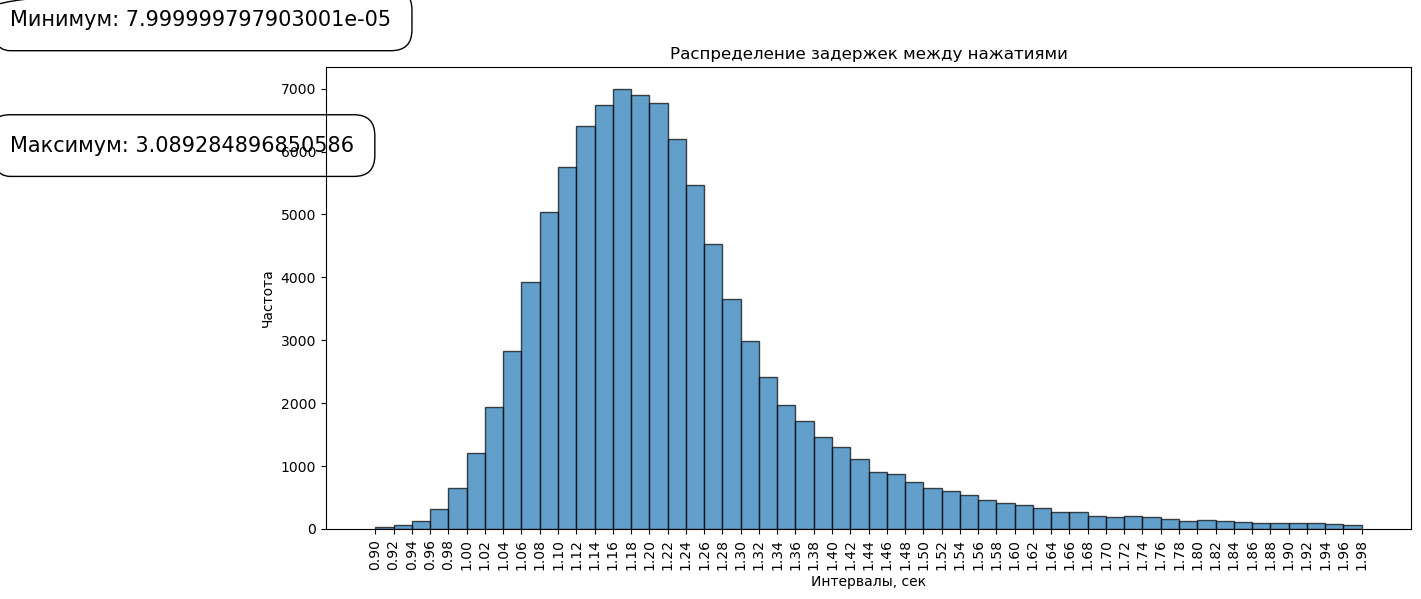

In [42]:
import numpy as np
import matplotlib.pyplot as plt

data = get_X('datasets_bad_article.txt')[:, 1]
# mask = data != 99999.0
# data = data[mask]

# Определение интервалов
bins = np.arange(0.9, 2.0, 0.02)

# Построение гистограммы
hist, bin_edges = np.histogram(data, bins=bins)

# Вывод интервалов и соответствующих подсчетов
# for i in range(len(hist)):
#     print(f"От {bin_edges[i]} до {bin_edges[i+1]}: {hist[i]}")

# Построение графика
plt.figure(figsize=(14, 6))

plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel('Интервалы, сек')
plt.ylabel('Частота')
plt.title('Распределение задержек между нажатиями')

# plt.xticks(bins)
plt.xticks(bins, rotation=90)  # Установка меток оси X и их поворот на 90 градусов для лучшей читаемости
# plt.grid(axis='x', linestyle='--')  # Добавление сетки по оси X для лучшей визуализации

# Добавление рамки с минимальным и максимальным значениями
# Добавление рамки с минимальным и максимальным значениями
# print(data.min(), data.max())
plt.text(0.5, 8000, f"Минимум: {data.min()}", fontsize=15, ha='left', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.text(0.5, 6000, f"Максимум: {data.max()}", fontsize=15, ha='left', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

plt.show()

In [41]:
import numpy as np

with open('datasets.txt', 'r') as file:
        records = [line.rstrip().split() for line in file]

X = []
for line in records:
    n = len(line)
    if n > 1:
        for i in range(0, n - 2, 2):
            new = np.array([np.float32(x) for x in line[i:i + 2 + 1]])
            if new[1] == 99999.0:
                new[1] = np.float32(np.random.uniform(2.0, 4.0))
            X.append(new)
X = np.vstack(X)

dct = {}
for line in X:
    a, b = line[0], line[2]
    key = (a, b)
    dct[key] = dct.get(key, []) + [line[1]]

dct = dict(sorted(dct.items(), key=lambda item: len(item[1]), reverse=True))

dct = {k: np.mean(np.array(dct[k])) for k in dct}

for key in dct:
    print(key, dct[key])

(65506.0, 63000.0) 0.091339946
(10400.0, 10200.0) 0.1643307
(11000.0, 10600.0) 0.16232754
(99000.0, 11000.0) 0.18303211
(11600.0, 12100.0) 0.1635753
(12100.0, 10600.0) 0.20230196
(10400.0, 10600.0) 0.1708511
(10300.0, 10600.0) 0.14733645
(12100.0, 10200.0) 0.14646699
(12100.0, 98000.0) 0.20819438
(10300.0, 10400.0) 0.12711477
(11000.0, 10200.0) 0.1606101
(11400.0, 10200.0) 0.19364944
(11000.0, 10900.0) 0.18188457
(11400.0, 10600.0) 0.17154819
(11600.0, 10400.0) 0.16113788
(10600.0, 10000.0) 0.1908442
(10200.0, 11000.0) 0.17726825
(10600.0, 11000.0) 0.17826469
(12100.0, 11600.0) 0.15437311
(10600.0, 44000.0) 0.2565708
(10400.0, 11600.0) 0.16464226
(11000.0, 11600.0) 0.22743098
(10700.0, 98000.0) 0.26054808
(10600.0, 10400.0) 0.19621804
(11800.0, 11600.0) 0.19815522
(10700.0, 10900.0) 0.18243928
(11600.0, 11000.0) 0.18920264
(10200.0, 10700.0) 0.22697459
(10000.0, 10200.0) 0.12100201
(10600.0, 12100.0) 0.2515021
(10200.0, 11400.0) 0.19985935
(10200.0, 12100.0) 0.16877079
(10800.0, 11600.

In [50]:
for k in dct:
    a = np.array([k[0], dct[k], k[1]]).reshape(1, 3)
    print(a)

[[6.5506000e+04 9.1339946e-02 6.3000000e+04]]
[[1.040000e+04 1.643307e-01 1.020000e+04]]
[[1.1000000e+04 1.6232754e-01 1.0600000e+04]]
[[9.9000000e+04 1.8303211e-01 1.1000000e+04]]
[[1.160000e+04 1.635753e-01 1.210000e+04]]
[[1.2100000e+04 2.0230196e-01 1.0600000e+04]]
[[1.040000e+04 1.708511e-01 1.060000e+04]]
[[1.0300000e+04 1.4733645e-01 1.0600000e+04]]
[[1.2100000e+04 1.4646699e-01 1.0200000e+04]]
[[1.2100000e+04 2.0819438e-01 9.8000000e+04]]
[[1.0300000e+04 1.2711477e-01 1.0400000e+04]]
[[1.100000e+04 1.606101e-01 1.020000e+04]]
[[1.1400000e+04 1.9364944e-01 1.0200000e+04]]
[[1.1000000e+04 1.8188457e-01 1.0900000e+04]]
[[1.1400000e+04 1.7154819e-01 1.0600000e+04]]
[[1.1600000e+04 1.6113788e-01 1.0400000e+04]]
[[1.060000e+04 1.908442e-01 1.000000e+04]]
[[1.0200000e+04 1.7726825e-01 1.1000000e+04]]
[[1.0600000e+04 1.7826469e-01 1.1000000e+04]]
[[1.2100000e+04 1.5437311e-01 1.1600000e+04]]
[[1.060000e+04 2.565708e-01 4.400000e+04]]
[[1.0400000e+04 1.6464226e-01 1.1600000e+04]]
[[1.10

In [81]:
import numpy as np

with open('datasets.txt', 'r') as file:
        records = [line.rstrip().split() for line in file]

X = []
for line in records:
    n = len(line)
    if n > 1:
        for i in range(0, n - 2, 2):
            new = np.array([np.float32(x) for x in line[i:i + 2 + 1]])
            if new[1] != 99999.0:
                X.append(new)
X = np.vstack(X)

dct = {}
for line in X:
    a, b = line[0], line[2]
    key = (a, b)
    dct[key] = dct.get(key, []) + [line[1]]

dct = dict(sorted(dct.items(), key=lambda item: len(item[1]), reverse=True))

dct = {k: np.mean(np.array(dct[k])) for k in dct}

from tensorflow.keras import models
loaded = models.load_model('smth_good.h5')

# Пример предсказания
examples = np.array([np.array([k[0], dct[k], k[1]]).reshape(1, 3) for k in dct])
for example in examples:
    if 1.0 < example[0][1] < 1.3:
        print(f"Для клавиш {example[0][0]} и {example[0][2]}")
        prediction = loaded.predict(example, verbose=False)
        print(f"Предсказание для интервала {example[0][1]:.5f} сек. (нормальный): {prediction[0][0]:.5f} -> {round(prediction[0][0])}")
        # print(example)
        example[0][1] += np.float32(np.random.uniform(0.5, 1.5))
        # print(example)
        prediction = loaded.predict(example, verbose=False)
        print(f"Предсказание для интервала {example[0][1]:.5f} сек. (аномальный): {prediction[0][0]:.5f} -> {round(prediction[0][0])}")

Для клавиш 40000.0 и 65506.0
Предсказание для интервала 1.10515 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 1.86078 сек. (аномальный): 1.00000 -> 1
Для клавиш 40000.0 и 10500.0
Предсказание для интервала 1.10878 сек. (нормальный): 0.79973 -> 1
Предсказание для интервала 2.39240 сек. (аномальный): 1.00000 -> 1
Для клавиш 53000.0 и 53000.0
Предсказание для интервала 1.11366 сек. (нормальный): 0.99922 -> 1
Предсказание для интервала 2.17910 сек. (аномальный): 1.00000 -> 1
Для клавиш 40000.0 и 11100.0
Предсказание для интервала 1.04145 сек. (нормальный): 0.64079 -> 1
Предсказание для интервала 2.09205 сек. (аномальный): 1.00000 -> 1
Для клавиш 93000.0 и 91000.0
Предсказание для интервала 1.12921 сек. (нормальный): 0.99798 -> 1
Предсказание для интервала 2.48657 сек. (аномальный): 1.00000 -> 1
Для клавиш 76000.0 и 10100.0
Предсказание для интервала 1.16265 сек. (нормальный): 0.00271 -> 0
Предсказание для интервала 2.64248 сек. (аномальный): 1.00000 -> 1
Для клавиш 91000.0 и 5

In [79]:
from tensorflow.keras import models
loaded = models.load_model('smth_good.h5')

# Пример предсказания
examples = np.array([np.array([k[0], dct[k], k[1]]).reshape(1, 3) for k in dct])
for example in examples:
    if example[0][1] > 1.3:
        print(f"Для клавиш {example[0][0]} и {example[0][2]}")
        prediction = loaded.predict(example, verbose=False)
        print(f"Предсказание для интервала {example[0][1]:.5f} сек. (нормальный): {prediction[0][0]:.5f} -> {round(prediction[0][0])}")
        # print(example)
        example[0][1] += np.float32(np.random.uniform(0.5, 1.5))
        # print(example)
        prediction = loaded.predict(example, verbose=False)
        print(f"Предсказание для интервала {example[0][1]:.5f} сек. (аномальный): {prediction[0][0]:.5f} -> {round(prediction[0][0])}")

Для клавиш 48000.0 и 53000.0
Предсказание для интервала 1.83638 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 2.82605 сек. (аномальный): 1.00000 -> 1
Для клавиш 53000.0 и 49000.0
Предсказание для интервала 2.64402 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 3.35583 сек. (аномальный): 1.00000 -> 1
Для клавиш 55000.0 и 49000.0
Предсказание для интервала 2.24697 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 2.76883 сек. (аномальный): 1.00000 -> 1
Для клавиш 56000.0 и 57000.0
Предсказание для интервала 1.81730 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 2.90763 сек. (аномальный): 1.00000 -> 1
Для клавиш 53000.0 и 53000.0
Предсказание для интервала 1.72792 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 2.41982 сек. (аномальный): 1.00000 -> 1
Для клавиш 40000.0 и 65506.0
Предсказание для интервала 1.47073 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 2.56666 сек. (аномальный): 1.00000 -> 1
Для клавиш 12200.0 и 4

In [75]:
from tensorflow.keras import models
loaded = models.load_model('smth_good.h5')

# Пример предсказания
examples = np.array([
                    [[46000, 4.501, 10800]],
                    [[46000, 4.001, 10800]],
                    [[46000, 3.201, 10800]],
                    [[46000, 3.01, 10800]],
                    [[46000, 2.0001, 10800]],
                    [[46000, 1.801, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.5009, 10800]],
                    [[46000, 1.4009, 10800]],
                    [[46000, 1.3009, 10800]],
                    [[46000, 1.2009, 10800]],
                    [[46000, 1.19, 10800]],
                    [[46000, 1.01, 10800]],
                    [[46000, 1.0, 10800]],
                    [[46000, 0.999, 10800]],
                    [[46000, 0.501, 10800]],
                    [[46000, 0.301, 10800]],
                    [[46000, 0.201, 10800]],
                    [[46000, 0.1013, 10800]],
                    [[46000, 0.0901, 10800]],
                    [[46000, 0.0501, 10800]],
                    [[46000, 0.0101, 10800]],
                    [[46000, 0.0081, 10800]],
                    [[46000, 0.0051, 10800]],
                    [[46000, 0.0011, 10800]]
                    ])
for example in examples:
    print(f"Для клавиш {example[0][0]} и {example[0][2]}")
    prediction = loaded.predict(example, verbose=False)
    print(f"Предсказание для интервала {example[0][1]:.5f} сек. (нормальный): {prediction[0][0]:.5f} -> {round(prediction[0][0])}")
    # print(example)
    example[0][1] += np.float32(np.random.uniform(0.5, 1.5))
    # print(example)
    prediction = loaded.predict(example, verbose=False)
    print(f"Предсказание для интервала {example[0][1]:.5f} сек. (аномальный): {prediction[0][0]:.5f} -> {round(prediction[0][0])}")

Для клавиш 46000.0 и 10800.0
Предсказание для интервала 4.50100 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 5.66601 сек. (аномальный): 1.00000 -> 1
Для клавиш 46000.0 и 10800.0
Предсказание для интервала 4.00100 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 5.35970 сек. (аномальный): 1.00000 -> 1
Для клавиш 46000.0 и 10800.0
Предсказание для интервала 3.20100 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 4.10567 сек. (аномальный): 1.00000 -> 1
Для клавиш 46000.0 и 10800.0
Предсказание для интервала 3.01000 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 3.87202 сек. (аномальный): 1.00000 -> 1
Для клавиш 46000.0 и 10800.0
Предсказание для интервала 2.00010 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 3.12283 сек. (аномальный): 1.00000 -> 1
Для клавиш 46000.0 и 10800.0
Предсказание для интервала 1.80100 сек. (нормальный): 0.99994 -> 1
Предсказание для интервала 3.13357 сек. (аномальный): 1.00000 -> 1
Для клавиш 46000.0 и 1

In [77]:
# (12000.0, 65505.0) 1.1206733
from tensorflow.keras import models
loaded = models.load_model('smth_good.h5')

# Пример предсказания
examples = np.array([
                    [[12000, 1.42, 65505]],
                    [[12000, 1.32, 65505]],
                    [[12000, 1.22, 65505]],
                    [[12000, 1.12, 65505]],
                    [[12000, 1.0, 65505]],
                    [[12000, 0.901, 65505]],
                    [[12000, 0.801, 65505]],
                    [[12000, 0.701, 65505]],
                    ])
for example in examples:
    print(f"Для клавиш {example[0][0]} и {example[0][2]}")
    prediction = loaded.predict(example, verbose=False)
    print(f"Предсказание для интервала {example[0][1]:.5f} сек. (нормальный): {prediction[0][0]:.5f} -> {round(prediction[0][0])}")
    # print(example)
    example[0][1] += np.float32(np.random.uniform(0.5, 1.5))
    # print(example)
    prediction = loaded.predict(example, verbose=False)
    print(f"Предсказание для интервала {example[0][1]:.5f} сек. (аномальный): {prediction[0][0]:.5f} -> {round(prediction[0][0])}")

Для клавиш 12000.0 и 65505.0
Предсказание для интервала 1.42000 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 2.46379 сек. (аномальный): 1.00000 -> 1
Для клавиш 12000.0 и 65505.0
Предсказание для интервала 1.32000 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 1.89627 сек. (аномальный): 1.00000 -> 1
Для клавиш 12000.0 и 65505.0
Предсказание для интервала 1.22000 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 1.89658 сек. (аномальный): 1.00000 -> 1
Для клавиш 12000.0 и 65505.0
Предсказание для интервала 1.12000 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 2.31508 сек. (аномальный): 1.00000 -> 1
Для клавиш 12000.0 и 65505.0
Предсказание для интервала 1.00000 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 2.33346 сек. (аномальный): 1.00000 -> 1
Для клавиш 12000.0 и 65505.0
Предсказание для интервала 0.90100 сек. (нормальный): 1.00000 -> 1
Предсказание для интервала 1.92050 сек. (аномальный): 1.00000 -> 1
Для клавиш 12000.0 и 6

In [84]:
# 95000.0 и 11100.0
# Предсказание для интервала 1.27926
from tensorflow.keras import models
loaded = models.load_model('smth_good.h5')

# Пример предсказания
examples = np.array([
                    [[95000, 2.47926, 11100]],
                    [[95000, 2.37926, 11100]],
                    [[95000, 2.27926, 11100]],
                    [[95000, 2.17926, 11100]],
                    [[95000, 1.97926, 11100]],
                    [[95000, 1.87926, 11100]],
                    [[95000, 1.77926, 11100]],
                    [[95000, 1.67926, 11100]],
                    [[95000, 1.57926, 11100]],
                    [[95000, 1.47926, 11100]],
                    [[95000, 1.37926, 11100]],
                    [[95000, 1.27926, 11100]],
                    [[95000, 1.17926, 11100]],
                    [[95000, 1.07926, 11100]],
                    [[95000, 0.97926, 11100]],
                    [[95000, 0.87926, 11100]],
                    [[95000, 0.77926, 11100]],
                    [[95000, 0.67926, 11100]],
                    [[95000, 0.57926, 11100]],
                    [[95000, 0.47926, 11100]],
                    ])
print(f"Для клавиш {example[0][0]} и {example[0][2]}")
for example in examples:
    # print(f"Для клавиш {example[0][0]} и {example[0][2]}")
    prediction = loaded.predict(example, verbose=False)
    print(f"Предсказание для интервала {example[0][1]:.5f} сек. (нормальный): {prediction[0][0]:.5f} -> {round(prediction[0][0])}")
    # # print(example)
    # example[0][1] += np.float32(np.random.uniform(0.5, 1.5))
    # # print(example)
    # prediction = loaded.predict(example, verbose=False)
    # print(f"Предсказание для интервала {example[0][1]:.5f} сек. (аномальный): {prediction[0][0]:.5f} -> {round(prediction[0][0])}")

Для клавиш 95000.0 и 11100.0
Предсказание для интервала 2.47926 сек. (нормальный): 0.99973 -> 1
Предсказание для интервала 2.37926 сек. (нормальный): 0.99895 -> 1
Предсказание для интервала 2.27926 сек. (нормальный): 0.99585 -> 1
Предсказание для интервала 2.17926 сек. (нормальный): 0.98369 -> 1
Предсказание для интервала 1.97926 сек. (нормальный): 0.79308 -> 1
Предсказание для интервала 1.87926 сек. (нормальный): 0.49189 -> 0
Предсказание для интервала 1.77926 сек. (нормальный): 0.19586 -> 0
Предсказание для интервала 1.67926 сек. (нормальный): 0.05785 -> 0
Предсказание для интервала 1.57926 сек. (нормальный): 0.01527 -> 0
Предсказание для интервала 1.47926 сек. (нормальный): 0.00389 -> 0
Предсказание для интервала 1.37926 сек. (нормальный): 0.00099 -> 0
Предсказание для интервала 1.27926 сек. (нормальный): 0.00025 -> 0
Предсказание для интервала 1.17926 сек. (нормальный): 0.00006 -> 0
Предсказание для интервала 1.07926 сек. (нормальный): 0.00002 -> 0
Предсказание для интервала 0.9792